In [48]:
pip install tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
data=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [79]:
data.head()
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [80]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
geography = pd.get_dummies(data['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(data['Gender'], drop_first=True).astype(int)

In [82]:
data = data.drop(['Geography', 'Gender'], axis=1)


In [83]:
data = pd.concat([data,geography,gender], axis=1)

In [84]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [85]:
from sklearn.model_selection import train_test_split


In [86]:

X = data.iloc[:, [i for i in range(12) if i != 8]]
Y = data.iloc[:, 8]


In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [90]:
#Initializing ANN
c=Sequential()

In [91]:
#Adding Input Layer
c.add(Dense(units=11, activation='relu'))
#adding 1st hidden layer
c.add(Dense(units=6, activation='relu'))
c.add(Dropout(0.2))
#adding 2nd hidden layer
c.add(Dense(units=7, activation='relu'))
c.add(Dropout(0.3))
#adding output layer
c.add(Dense(1, activation='sigmoid'))




In [92]:
c.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [93]:
import tensorflow as tf
e=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [94]:
m=c.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=e)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6733 - loss: 0.6091 - val_accuracy: 0.7974 - val_loss: 0.4510
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.4655 - val_accuracy: 0.8008 - val_loss: 0.4392
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8088 - loss: 0.4502 - val_accuracy: 0.8080 - val_loss: 0.4297
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4661 - val_accuracy: 0.8175 - val_loss: 0.4231
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.4552 - val_accuracy: 0.8186 - val_loss: 0.4159
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8302 - loss: 0.4021 - val_accuracy: 0.8262 - val_loss: 0.4069
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3987 - val_accuracy: 0.8323 - val_loss: 0.3939
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3869 - 

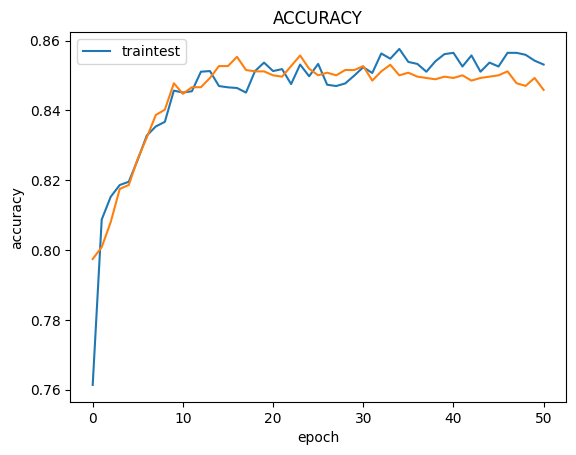

In [95]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train''test'],loc='upper left')
plt.show()

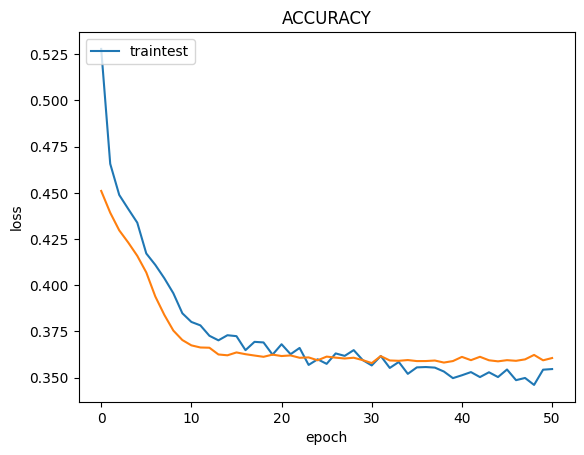

In [96]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('ACCURACY')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train''test'],loc='upper left')
plt.show()

In [97]:
y_pred=c.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1558,   37],
       [ 234,  171]])

In [99]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8645